In [1]:
# 线性回归从零开始实现

In [2]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from d2l import torch as d2l
%matplotlib inline

In [3]:
# 自己构造一个带有噪声的线性模型人造数据集。
# 我们使用线性模型参数w = [2,-3.4]^T，b = 2和噪声项c生成数据集及其标签：
# y = Xw + b + c

In [4]:
def synthetic_data(w, b, num_examples):               # w为标准参数，b为标准偏差
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))    # 生成均值为0，方差为1，1000行，2列的二维数据
    y = torch.matmul(X, w) + b                        # y就等于一列数，y = wx + b
    y += torch.normal(0, 0.01, y.shape)               # y在加上一个和y形状一样，均值为0，方差为0.01的一列随机噪音数
    return X, y.reshape((-1, 1))                      # X为训练样本，不带标签；y为训练标签
                                                      # 要返回的X形状为num_examples行，len(w)列
                                                      # y的形状为num_examples行，1列

In [5]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000) 

In [6]:
# 观察样本
# features中的每一行都包含一个二维样本，labels中的每一行都包含一维标签值(一个标量)
print("features: ", features[0], "\nlabel: ", labels[0])

features:  tensor([-0.1942, -0.6593]) 
label:  tensor([6.0554])


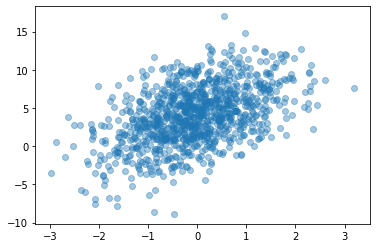

In [7]:
x1 = features[:, 0]
x2 = features[:, 1]
y = labels
plt.scatter(x1, y, alpha=0.4)
plt.show()

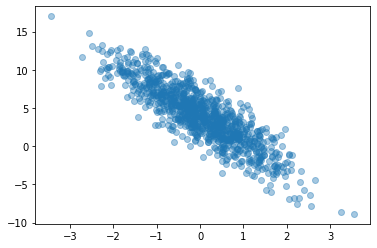

In [8]:
plt.scatter(x2, y, alpha=0.4)
plt.show()

In [9]:
# 定义一个data_iter函数，该函数接受批量的大小，特征矩阵和标签向量作为输入，
# 生成大小为batch_size的小批量

In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))            # 生成一个从0到num_examples的列表,range(1000)->ans:range(0,1000)
                                                   # 目的是为了，生成索引list
    random.shuffle(indices)                        # 把原有indices中元素顺序随机打乱
    for i in range(0, num_examples, batch_size):   # 开始，结尾-1，前进的步长
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield  features[batch_indices], labels[batch_indices]    
        # 简要理解：yield就是return返回一个或一组值，并记住这个返回的位置，下次迭代就从这个位置后开始

In [11]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4122, -1.2744],
        [-0.8462, -0.5205],
        [-0.4871,  0.1274],
        [ 0.6576,  0.5999],
        [ 1.4832,  0.0105],
        [ 0.3574, -0.6332],
        [-0.8250, -0.2181],
        [ 1.0282,  0.0999],
        [ 0.0151, -0.1432],
        [-1.1002,  0.4029]]) 
 tensor([[9.3583],
        [4.2736],
        [2.7650],
        [3.4800],
        [7.1233],
        [7.0619],
        [3.3029],
        [5.9176],
        [4.7202],
        [0.6370]])


In [12]:
# 定义初始化模型参数

In [13]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [14]:
# 定义模型

In [15]:
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b            # 返回的是一组预测的y值

In [16]:
# 定义损失函数

In [17]:
def squared_loss(y_hat, y):
    """均方损失。"""
    return ((y_hat - y.reshape(y_hat.shape))**2) / 2

In [18]:
# 定义优化算法

In [19]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [20]:
# 进行训练

In [21]:
lr = 0.01
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)                           # X, y是小批量
        # 因为l的形状是(batch_size, 1)，而不是一个标量。l中的所有元素被加到一起
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 2.381393
epoch 2, loss 0.375328
epoch 3, loss 0.060272
epoch 4, loss 0.009854
epoch 5, loss 0.001670
epoch 6, loss 0.000320
epoch 7, loss 0.000097
epoch 8, loss 0.000059
epoch 9, loss 0.000053
epoch 10, loss 0.000052


In [22]:
# 比较真实参数和通过训练学到参数来评估训练的成功程度

In [23]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')

w的估计误差：tensor([ 0.0004, -0.0006], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0004], grad_fn=<RsubBackward1>)


In [24]:
w, b

(tensor([[ 1.9996],
         [-3.3994]], requires_grad=True), tensor([4.1996], requires_grad=True))